# Logfiles analysis

Let us inspect the result of a BigDFT calculation from the `Logfile` class.

An instance is returned after the execution is finished in the form of a `yaml` file, from which the `Logfile` object is extracted.

Let us for example investigate the logfile of the LDA calculation of N2.

In [ ]:
install = "client (Google drive)" #@param ["full_suite", "client (Google drive)", "client"]
install_var=install
!wget https://gitlab.com/luigigenovese/bigdft-school/-/raw/main/packaging/install.py &> /dev/null
args={'locally': True} if install == 'client' else {}
import install
getattr(install,install_var.split()[0])(**args)

Mounted at /content/drive
Executing: mkdir -p /content/drive/MyDrive

Executing: git clone --depth 1 https://github.com/BigDFT-group/bigdft-school
Error Occurred:  
 fatal: destination path 'bigdft-school' already exists and is not an empty directory.

Executing: mkdir -p /content/drive/MyDrive/bigdft-school



In [ ]:
from BigDFT import Logfiles as L

logfile = L.Logfile('./scratch/log-xc__LDA.yaml')

From this instance, it is first possible to visualize the associated system

In [ ]:
from BigDFT import Systems as S

sys = S.system_from_log(logfile,fragmentation='full')
sys.display();

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

The information of the logfile are presented clearly

In [ ]:
print(logfile)

- Atom types:
  - N
- cell: Free BC
- number_of_orbitals: 5
- posinp_file: xc__LDA.yaml
- XC_parameter: -20
- grid_spacing: 0.3
- spin_polarization: 1
- total_magn_moment: 0
- system_charge: 0
- rmult: 6
- dipole:
  - -7.546821e-05
  - -7.546821e-05
  - -0.0001150379
- energy: -19.889158366113875
- fermi_level: -0.382575362697
- forcemax: 0.01184049963069
- forcemax_cv: 0.0
- gnrm_cv: 0.0001
- nat: 2
- symmetry: disabled
- No. of KS orbitals:
  - 5



The `yaml` serialization is easily obtainable by calling the `log` attribute, in the form of a `dict`. However, this serialiazation is not particularly useful to visualize the output. Better to refer directly to the logfile.

In [ ]:
from yaml import dump
print(dump(logfile.log))

Accumulated memory requirements during principal run stages (MiB.KiB):
  Density Construction: 192.2
  Hamiltonian application: 193.614
  Kernel calculation: 268.641
  Orbitals Orthonormalization: 193.614
  Poisson Solver: 274.794
Atomic Forces (Ha/Bohr):
- N:
  - 0.0
  - -3.388131789017e-21
  - -0.01184049963069
- N:
  - 0.0
  - 3.388131789017e-21
  - 0.01184049963069
Atomic System Properties:
  Boundary Conditions: Free
  Number of Symmetries: 0
  Number of atomic types: 1
  Number of atoms: 2
  Space group: disabled
  Types of atoms:
  - N
Atomic structure:
  Rigid Shift Applied (AU):
  - 8.1
  - 8.1
  - 9.15
  position offset:
  - -8.1
  - -8.1
  - -9.15
  positions:
  - N:
    - 4.286335408
    - 4.286335408
    - 5.39077148
  - N:
    - 4.286335408
    - 4.286335408
    - 4.29317148
  units: angstroem
Average noise forces:
  total: 2.6498158e-05
  x: -1.62783873e-05
  y: -1.62783874e-05
  z: 1.31217602e-05
Basis set definition:
  Coarse and Fine Radii Multipliers:
  - 6.0
  - 6.0

For example, information on the Poisson solver is accessible by

In [ ]:
logfile.log["Poisson Solver"]

{'BC': 'Free', 'Box': [139, 139, 153], 'MPI tasks': 1}

Or similarly, the self-consistent field cycle

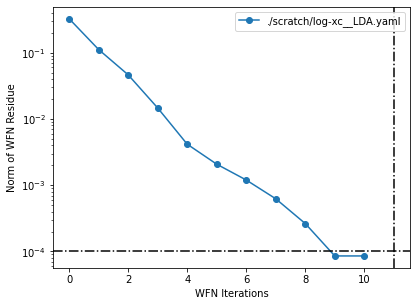

In [ ]:
logfile.SCF_convergence()

All `keys` elements are listed afterwards

In [ ]:
print(logfile.log.keys())

dict_keys(['Code logo', 'Reference Paper', 'Version Number', 'Timestamp of this run', 'Root process Hostname', 'Number of MPI tasks', 'OpenMP parallelization', 'Maximal OpenMP threads per MPI task', 'Compilation options', 'radical', 'outdir', 'logfile', 'run_from_files', 'skip', 'dft', 'psolver', 'chess', 'output', 'kpt', 'geopt', 'md', 'mix', 'sic', 'tddft', 'mode', 'perf', 'lin_general', 'lin_basis', 'lin_kernel', 'lin_basis_params', 'psppar.N', 'posinp', 'Data Writing directory', 'Atomic System Properties', 'Geometry Optimization Parameters', 'Material acceleration', 'DFT parameters', 'Basis set definition', 'Self-Consistent Cycle Parameters', 'Post Optimization Parameters', 'Properties of atoms in the system', 'Atomic structure', 'Box Grid spacings', 'Sizes of the simulation domain', 'High Res. box is treated separately', 'Wavefunctions Descriptors, full simulation domain', 'Poisson Kernel Initialization', 'Poisson Kernel Creation', 'Total Number of Electrons', 'Spin treatment', 'O

## Extended systems: graphene

Let us inspect a simple example of a solid state calculation by considering a two-dimensional (2D) materials, graphene. 

In [ ]:
gr = L.Logfile("./scratch/log-graphene.yaml")

[Graphene](https://en.wikipedia.org/wiki/Graphene) is a 2D carbon allotrope in the form of a honeycomb network that consists of a two inequivalent triangular lattices, with a C-C bond of 1.42$~$angstroem, or equivalently, a lattice parameter such that $a_0 = 2.46~$angstroem.

In [ ]:
# or gr.log["Atomic structure"]
gr.astruct

{'units': 'angstroem',
 'cell': [4.330127018922193, inf, 2.5],
 'positions': [{'C': [0.0, 4.127582245, 1.25]},
  {'C': [2.165063509, 4.127582245, 0.0]},
  {'C': [0.7216878365, 4.127582245, 0.0]},
  {'C': [2.886751346, 4.127582245, 1.25]}],
 'position offset': [0.0, -7.8, 0.0],
 'Rigid Shift Applied (AU)': [0.0, 7.8, 0.0],
 'forces': [{'C': [3.725158813391e-05, 0.0, -1.280528231035e-18]},
  {'C': [3.725158813391e-05, 0.0, 2.817162108277e-18]},
  {'C': [-3.725158813391e-05, 0.0, -2.048845169656e-18]},
  {'C': [-3.725158813391e-05, 0.0, -2.048845169656e-18]}]}

In [ ]:
# this only visualizes the unit cell atoms
sys = S.system_from_log(gr,fragmentation='full')
sys.display();

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In order to properly characterize extended systems, a $k$-points mesh is required to handle periodicity. 

In [ ]:
gr.kpt_mesh

[15, 1, 27]

Additionally, mixing is sometimes needed for convergence, such that the effect of abrupt changes in the density are smoothened away.

In [ ]:
print(dump(gr.log["mix"]))
# inp["import"] = "mixing"

alphadiis: 1.d0
alphamix: 0.8
diis_sd_switch_tolerance: 0
iscf: 17
itrpmax: 200
norbsempty: 10
occopt: 1
rpnrm_cv: 1.0e-10
tel: 0.01



The interested reader is invited to go through this [tutorial](../tutorials/SolidState.ipynb)

### Graphene massless Dirac fermions

When analyzing electronic properties, the $k$-dependence is obtained by plotting the band structure. This is done along a given path, that can be specified by the user. 

In [ ]:
install.packages('spglib','ase')

In [ ]:
BZ_gr = gr.get_brillouin_zone()

hsp = BZ_gr.special_points # high symmetry points
[print(i) for i in hsp.items()]
paths = BZ_gr.special_paths # high symmetry path list
print(paths)

spacegroup P6/mmm (191)
Lattice found: orthorhombic


/content/drive/MyDrive/bigdft-school/install/lib/python3.7/site-packages/ase/dft/kpoints.py:655: UserWarning: Please call this function with cell as the first argument
  warnings.warn('Please call this function with cell as the first '


irreductible k-points 112
Interpolation bias 1.0852849288836878e-08
('G', array([0., 0., 0.]))
('R', array([0.5, 0.5, 0.5]))
('S', array([0. , 0.5, 0.5]))
('T', array([0.5, 0. , 0.5]))
('U', array([0.5, 0.5, 0. ]))
('X', array([0. , 0.5, 0. ]))
('Y', array([0. , 0. , 0.5]))
('Z', array([0.5, 0. , 0. ]))
[['G', 'X', 'S', 'Y', 'G', 'Z', 'U', 'R', 'T', 'Z'], ['Y', 'T'], ['U', 'X'], ['S', 'R']]


Here we choose half the first path, since the 2D character of our system implies no dependence in $k_x$.

In [ ]:
path = paths[0][:5]

Eventually, the band structure is plotted using the `BZ` class by giving a list of special $k$-points (i.e. the `path` defined above)

/content/drive/MyDrive/bigdft-school/install/lib/python3.7/site-packages/ase/dft/kpoints.py:357: UserWarning: Please do not use (kpts, x, X) = bandpath(...).  Use path = bandpath(...) and then kpts = path.kpts and (x, X, labels) = path.get_linear_kpoint_axis().
  warnings.warn('Please do not use (kpts, x, X) = bandpath(...).  '


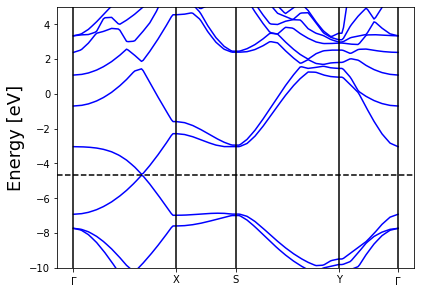

In [ ]:
import BigDFT.BZ as BZ

npts = 200
path_bs = BZ.BZPath(BZ_gr.lattice,path,hsp,npts=npts)

ax = BZ_gr.plot(path=path_bs,npts=npts)
ax.set_ylim([-10,5]);

## Exercise on XC functional (suite)

From the previous analysis on XC functionals of N2, compare the following physical or numerical properties:
-  the density of states
-  the wavefunction convergence
-  the memory employed
-  ...

**Hint**: the `Logfile` are obtained with the fetch_results() method

In [ ]:
#get the data
install.data('data/session1.tar.xz')

In [ ]:
from BigDFT import Datasets as D
from BigDFT import Inputfiles as I
from BigDFT import Calculators as C
from BigDFT.Database import Molecules as M # alternative method to get N2 positions
from copy import deepcopy
inp = I.Inputfile()
inp.set_hgrid(.3)
inp.set_rmult(6)
pos = M.Molecule('N2')
study = C.SystemCalculator(skip=True,verbose=True)
xc_dataset = D.Dataset('xc')
xc_list = ['LDA','PBE','HF','PBE0']
for xc in xc_list:
    inp_run = deepcopy(inp)
    inp_run.set_xc(xc)
    if xc in ['HF','PBE0']:
        inp_run['psppar.N']={'Pseudopotential XC': 1} 
    xc_dataset.append_run(id={'xc':xc},run_dir='scratch',input=inp_run,posinp=pos,runner=study)

Initialize a Calculator with OMP_NUM_THREADS=1 and command /content/drive/MyDrive/bigdft-school/install/bin/bigdft


In [ ]:
xc_dataset.run()

Creating the yaml input file "scratch/xc__LDA.yaml"
Run directory scratch
Executing command:  /content/drive/MyDrive/bigdft-school/install/bin/bigdft -n xc__LDA -s Yes
Creating the yaml input file "scratch/xc__PBE.yaml"
Run directory scratch
Executing command:  /content/drive/MyDrive/bigdft-school/install/bin/bigdft -n xc__PBE -s Yes
Creating the yaml input file "scratch/xc__HF.yaml"
Run directory scratch
Executing command:  /content/drive/MyDrive/bigdft-school/install/bin/bigdft -n xc__HF -s Yes
Creating the yaml input file "scratch/xc__PBE0.yaml"
Run directory scratch
Executing command:  /content/drive/MyDrive/bigdft-school/install/bin/bigdft -n xc__PBE0 -s Yes


{0: <BigDFT.Logfiles.Logfile at 0x7f815a809910>,
 1: <BigDFT.Logfiles.Logfile at 0x7f8158e21f10>,
 2: <BigDFT.Logfiles.Logfile at 0x7f8158afd950>,
 3: <BigDFT.Logfiles.Logfile at 0x7f8159421950>}

In [ ]:
logfiles = xc_dataset.fetch_results()

### Solution

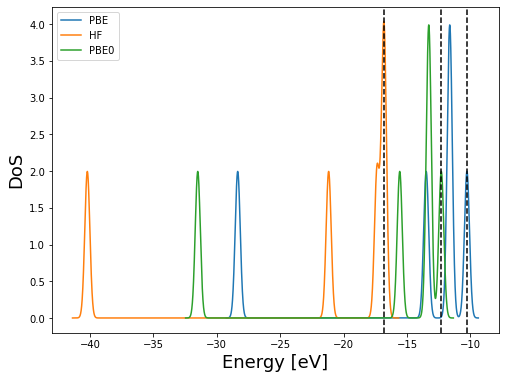

In [ ]:
from matplotlib import pyplot as plt, lines
fig,ax = plt.subplots(figsize=(8,6))
for log in logfiles[1:]:
    dos = log.get_dos()
    dos.plot(ax=ax)
colors = ['tab:blue','tab:orange','tab:green']
lins = [lines.Line2D([0],[0],color=c) for c in colors]
ax.legend(lins,xc_list[1:]);

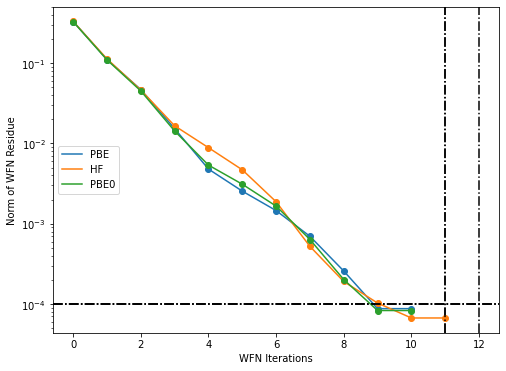

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
for log in logfiles[1:]:
    log.SCF_convergence(ax=ax)
colors = ['tab:blue','tab:orange','tab:green']
lins = [lines.Line2D([0],[0],color=c) for c in colors]
ax.legend(lins,xc_list[1:]);

In [ ]:
for log,xc in zip(logfiles,xc_list):
    print(xc,log.log['Estimated Memory Peak (MB)'])

LDA 274
PBE 274
HF 274
PBE0 274
